In [21]:
from typing import Tuple

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from pandas import Series
from scipy.stats import stats

data = pd.read_csv(f'../data/02_Student_Mental_Health_2021-10-10.csv')

In [22]:
print(f'{data.shape[1]}col  x {data.shape[0]} row')

147col  x 1659 row


In [23]:
data

,StartDate,EndDate,Duration (in seconds),Eligibility,Age,Ethnicity,Ethnicity_text,Sex,Gender,Year_credits,...,Post_PSS_1,Post_PSS_2,Post_PSS_3,Post_PSS_4,Post_PSS_5,Post_PSS_6,Post_PSS_7,Post_PSS_8,Post_PSS_9,Post_PSS_10
0,2020-09-22 13:57,2020-09-22 14:05,461.0,1.0,18.0,2.0,NaN,2.0,2.0,1.0,...,4.0,3.0,3.0,1.0,3.0,3.0,2.0,3.0,3.0,3.0
1,2020-09-22 14:16,2020-09-22 14:36,1215.0,1.0,18.0,1.0,NaN,2.0,2.0,1.0,...,5.0,4.0,3.0,4.0,2.0,2.0,3.0,4.0,3.0,2.0
2,2020-09-22 14:59,2020-09-22 15:07,526.0,1.0,18.0,2.0,NaN,2.0,2.0,1.0,...,2.0,3.0,4.0,3.0,4.0,4.0,2.0,3.0,4.0,4.0
3,2020-09-22 16:07,2020-09-22 16:15,516.0,1.0,19.0,1.0,NaN,2.0,2.0,1.0,...,4.0,4.0,5.0,4.0,2.0,4.0,3.0,3.0,4.0,3.0
4,2020-09-22 17:15,2020-09-22 18:01,2751.0,1.0,18.0,1.0,NaN,2.0,2.0,1.0,...,2.0,1.0,5.0,4.0,3.0,3.0,4.0,3.0,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1654,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1655,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1656,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1657,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
MAX_NOMINAL_VALUES = 100
GLOBAL_MISSING = []

In [6]:
#def read_column(column: Series):


In [7]:
from typing import Any


def analyse_column_distribution(column: Series, column_name: str, missing_values: dict) -> tuple[
    Series, bool, int, bool]:
    missing_value_number = column.isna().sum()

    print(f'missing values : "{missing_value_number}"')
    print("next")
    if column_name in missing_values:
        line_to_drop = column[column == missing_values[column_name]].index
        print(f'{len(line_to_drop)} lines dropped.')
        column = column.drop(line_to_drop, inplace=True)

    histo: dict = column.value_counts().to_dict()
    print(type(histo))
    quanti: bool = False
    is_nominal: bool = len(histo) < MAX_NOMINAL_VALUES
    if column.dtype == float:
        quanti = True

    value_count = column.value_counts()

    print(f'histogram : {histo}')
    print(f'{len(value_count)} unique value')
    print(f'column dtype : {column.dtype}')
    print(f'is quantitative : {quanti}')
    print(f'is nominal: {is_nominal}')
    return column, quanti, len(value_count), is_nominal

In [8]:
a = {}
print(str(len(a)))

0


In [9]:
def check_numerical_df(df):
    return df.select_dtypes(include=['int', 'float']).columns.shape[0] == df.columns.shape[0]

In [10]:
data.shape[0]

1659

In [18]:
from statistics import mode


def plot_numeric_col(df, n_col):
    if not check_numerical_df(df):
        raise Exception('error')

    num_plots = len(df)
    num_cols = 3
    num_rows = -(-num_plots // num_cols)

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5))
    axes = axes.flatten()

    for i, column in enumerate(df.columns):
        values = df[column].dropna()
        histo = values.values_counts()

        if len(histo) <= 10:
            axes[i].pie(histo.values, labels=histo.index, autopct='%1.1f%')
            axes[i].set_title(f'Pie for {column}')
        else:
            axes[i].hist(values, color='skyblue', bins=20)
            axes[i].set_title(f'Histogram of {column}')
            axes[i].set_xlabel(column)
            axes[i].set_ylabel('Frequency')

            column_serie = df[column]
            skew, kurtosis = column_serie.skew(), column_serie.kurtosis()
            mean, median = np.mean(values), np.median(values)
            
            try:
                mode_value = mode(values).mode[0]
            except:
                mode_value = None
                
            gaussian = abs(skew) < 0.2 and kurtosis > -1
            axes[i].axvline(mean, color='r', linestyle='--', linewidth=2, label=f'mean={mean:.2f}')
            axes[i].axvline(median, color='g', linestyle='-', linewidth=2, label=f'median={median:.2f}')
            if mode_value is not None:
                axes[i].axvline(mode_value, color='b', linestyle='-.', linewidth=2, label=f'mode={mode_value:.2f}')
            axes[i].legend()
            print('\tskew =', skew, '\n\tkurtosis =', kurtosis)
        #ax = axes[i]
        #print(i)
        #histo: dict = df[column].value_counts().to_dict()

        #if len(histo) <= 10:
        #    ax.pie(histo.values(), labels=histo.keys())
        #else:
        #    ax.hist(df[column])
        #if gaussian:
            #mean, median = np.mean(column_serie), np.median(column_serie)
            #print('\tmean =', mean, '\n\tmedian =', median)

            #axes[i].plot([mean, mean], [0, 20], label=f'mean={mean:.2f}')
            #axes[i].plot([median, median], [0, 20], label=f'median={median:.2f}')

        #ax.set_title(f"Graphique {column}")

    for j in range(i + 1, num_rows * num_cols):
        fig.delaxes(axes[j])
    fig.tight_layout()
    plt.show()






In [19]:

def plot_text_col(df):
    if check_numerical_df(df):
        raise Exception('error')

    axSize = int(np.ceil(np.sqrt(df.shape[1])))
    fig, axes = plt.subplots(axSize, axSize, figsize=(15, 5))

    j = 0
    k = 0
    for i, column in enumerate(df.columns):
        column_serie = df[column]

        ax = axes
        if axSize > 1:
            ax = axes[k, i]
            k = (k + 1) % axSize
        print(i, j)
        histo: dict = df[column].value_counts().to_dict()

        if len(histo) <= 10:
            ax.pie(histo.values(), labels=histo.keys())

        ax.set_title(f"Graphique {column}")
    fig.tight_layout()
    plt.show()


142
-------------------
5


AttributeError: 'Series' object has no attribute 'values_counts'

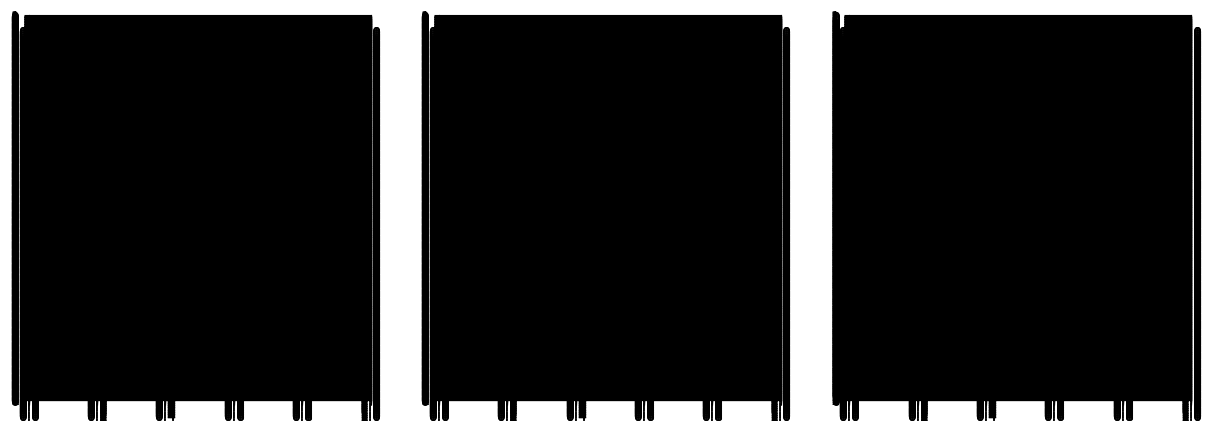

In [20]:
def plot_hist(df):
    numerical_col = df.select_dtypes(include=['int', 'float'])
    text_col = df.select_dtypes(include=['object'])

    print(numerical_col.columns.shape[0])
    print("-------------------")
    print(text_col.columns.shape[0])

    plot_numeric_col(numerical_col, 2)
    #plot_text_col(text_col)


plot_hist(data)

In [ ]:
analyse_column_distribution(data.iloc[:, 2], column_name="Age", missing_values={})

In [ ]:
for column in data.columns.values:
    col, quanti, unique_val_count, is_nominal = analyse_column_distribution(data[column], column_name=data[column].name,
                                                                            missing_values={})


11
11 variables x 101 lines


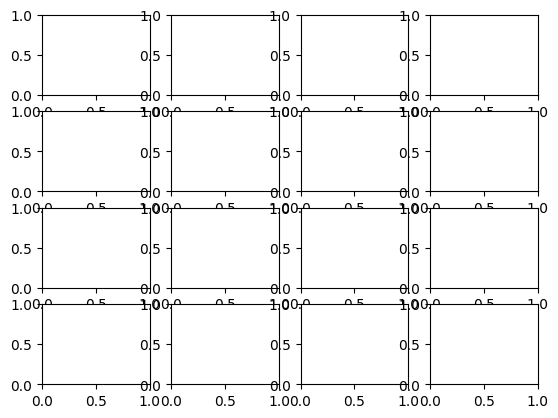

In [148]:
length = data.axes[1].size
print(length)
axSize = int(np.ceil(np.sqrt(length)))
fig, axes = plt.subplots(axSize, axSize)

print(f'{length} variables x {data.shape[0]} lines')


In [122]:
numeric_rows = data.select_dtypes(include=['int', 'float']).columns

In [123]:
numeric_rows

Index(['Age'], dtype='object')